<div style="line-height:0.5">
<h1 style="color:#0FA345 "> Random Forest Classification 3 </h1>
<h4> Examples with sklearn RandomForestClassifier. Comparison with SVM and MLP. </h4>
<div style="margin-top: -4px;">
<span style="display: inline-block;">
    <h3 style="color: lightblue; display: inline;">Keywords:</h3> StandardScaler + feature_importances_ + label_binarize + roc 
</span>
</div>

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
from copy import copy
import matplotlib.pyplot as plt

from sklearn.svm import SVC 
import sklearn.linear_model as sk
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize

from sklearn.metrics import accuracy_score, roc_curve, auc, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.multiclass import OneVsRestClassifier

In [2]:
%%script echo Skipping since the file is already in its correct version.
with open('./data/simsim.csv', 'r') as f:
    lines = f.readlines()

new_lines = []
for line in lines:
    split_line = line.strip().split()
    new_line = ', '.join(split_line)
    new_lines.append(new_line)

with open('./data/simsim.csv', 'w') as f:
    f.writelines('\n'.join(new_lines))

Skipping since the file is already in its correct version.


In [3]:
df_simply = pd.read_csv('./data/simply_dataset.csv')
simply_column_names = df_simply.columns
print(simply_column_names)
print(type(simply_column_names))

Index(['TIME', 'ID', 'MAX', 'MIN', 'AVG', 'STDEV', 'SMOOTHNESS', 'PEACKS',
       'INTERACTION'],
      dtype='object')
<class 'pandas.core.indexes.base.Index'>


In [5]:
""" Get a portion of the dataframe.
N.B.1
'index_col' must be set to "False" to avoid the ValueError: The value of index_col couldn't be 'True'.
N.B.2
no 'index_col' parameter in case of columnns.
"""
df_partial0 = pd.read_csv('./data/simsim.csv', index_col=False)  
df_partial = pd.read_csv('./data/simsim.csv', header=None, names=simply_column_names)  

print(df_simply.head(10))
print("\n", df_partial[:10])

   TIME  ID    MAX    MIN     AVG  STDEV  SMOOTHNESS  PEACKS  INTERACTION
0  2323   0  0.000  0.000  0.0000  0.000           1       0            1
1  2700   1  0.385  0.299  0.1967  0.004           1       0            2
2  3323   2  2.545  1.996  2.1230  0.014           3       0            3
3  4123   3  3.985  2.642  2.9560  0.023           4       6            4
4  5327   4  3.553  2.347  2.9990  0.004           5       2            5
5  6311   5  5.369  2.584  3.0210  0.004           6       8            6
6  7743   6  5.694  4.342  4.6310  0.004           7       1            7
7  8921   7  0.000  0.000  0.0000  0.000           1       0            1
8  1220   8  0.396  0.277  0.1944  0.004           1       0            2
9  1345   9  0.352  0.199  0.2520  0.005           2       0            2

    TIME  ID    MAX    MIN    AVG  STDEV  SMOOTHNESS  PEACKS  INTERACTION
0  1001  44  5.123  2.785  3.442  0.012           4       3            5
1  1002  44  5.123  2.785  3.442  0.01

In [6]:
final_df = pd.concat([df_simply, df_partial], ignore_index=True)
print(final_df[159:])
print("\n", final_df.tail(10))
print("\n", final_df[-10:])

     TIME  ID    MAX    MIN    AVG  STDEV  SMOOTHNESS  PEACKS  INTERACTION
159  8789  31  2.345  1.234  1.567  0.004           2       0            3
160  8922  32  3.456  2.345  2.789  0.006           3       0            4
161  9056  33  4.567  3.456  3.789  0.008           4       0            5
162  9189  34  5.678  4.567  4.789  0.009           5       0            6
163  9323  35  2.678  1.567  2.123  0.004           3       1            3
164  9456  36  1.567  0.456  1.234  0.003           2       0            2
165  9589  37  0.456  0.123  0.345  0.002           1       0            1
166  9722  38  2.345  1.234  1.567  0.004           2       0            3
167  9856  39  3.456  2.345  2.789  0.006           3       0            4
168  9989  40  4.567  3.456  3.789  0.008           4       0            5

      TIME  ID    MAX    MIN    AVG  STDEV  SMOOTHNESS  PEACKS  INTERACTION
159  8789  31  2.345  1.234  1.567  0.004           2       0            3
160  8922  32  3.456  2

In [7]:
""" Sort """
final_sorted = final_df.sort_values(by='TIME', ascending=False)
final_sorted[:10]

,TIME,ID,MAX,MIN,AVG,STDEV,SMOOTHNESS,PEACKS,INTERACTION
43,9999,43,6.576,0.982,1.369,0.005,5,1,7
168,9989,40,4.567,3.456,3.789,0.008,4,0,5
42,9950,42,5.316,0.023,2.065,0.007,6,3,7
41,9912,41,2.321,2.662,2.695,0.015,1,2,7
40,9903,40,2.576,2.002,2.229,0.005,2,1,7
39,9881,39,2.576,0.045,1.252,0.011,7,2,7
167,9856,39,3.456,2.345,2.789,0.006,3,0,4
38,9802,38,2.576,2.002,2.223,0.009,3,3,7
166,9722,38,2.345,1.234,1.567,0.004,2,0,3
37,9711,37,2.576,2.002,2.223,0.011,7,8,6


In [8]:
""" Shuffle the dataframe in place """
df_shuffled = final_sorted.reindex(np.random.permutation(final_sorted.index))
df_shuffled[:10]

,TIME,ID,MAX,MIN,AVG,STDEV,SMOOTHNESS,PEACKS,INTERACTION
40,9903,40,2.576,2.002,2.229,0.005,2,1,7
39,9881,39,2.576,0.045,1.252,0.011,7,2,7
140,7323,20,5.678,4.567,4.789,0.009,5,0,6
153,8210,99,2.345,1.234,1.567,0.004,2,0,3
137,7143,91,0.456,0.123,0.345,0.002,1,0,1
23,7687,23,2.576,2.302,4.987,0.142,6,9,4
118,5676,80,4.567,3.456,3.789,0.008,4,0,5
98,4322,70,0.456,0.123,0.345,0.002,1,0,1
87,3656,65,3.456,2.345,2.789,0.006,3,0,4
61,1922,52,4.567,3.456,3.789,0.007,4,0,5


In [9]:
X_simply = df_shuffled.drop('INTERACTION', axis=1)
y_simply = df_shuffled['INTERACTION']

In [11]:
X_simply_train, X_simply_test, y_simply_train, y_simply_test = train_test_split(X_simply, y_simply, test_size = 0.2, random_state = 52)
X_simply_train, X_simply_val, y_simply_train, y_simply_val = train_test_split(X_simply_train, y_simply_train, test_size = 0.2, random_state = 52)

In [16]:
print(f"X_simply_train.size is = {X_simply_train.size}")
print(f"X_simply_test.size is = {X_simply_test.size}")
print(f"X_simply_val.size is = {X_simply_val.size}")
print(f"y_simply_train.size is = {y_simply_train.size}")
print(f"y_simply_test.size is = {y_simply_test.size}")
print(f"y_simply_val.size is = {y_simply_val.size}")
print()
print(f"type is => {type(y_simply_val)}")

X_simply_train.size is = 864
X_simply_test.size is = 272
X_simply_val.size is = 216
y_simply_train.size is = 108
y_simply_test.size is = 34
y_simply_val.size is = 27

type is => <class 'pandas.core.series.Series'>


In [17]:
""" StandardScaler() transform the data calculating the mean and standard deviation of each feature => zero mean + unit variance
    No need clearly to transform targets to continues values --> classification problem!
"""
sc = StandardScaler() 
X_train = sc.fit_transform(X_simply_train)
X_test = sc.fit_transform(X_simply_test)
X_val = sc.fit_transform(X_simply_val)

#y_simply_train_2d = np.reshape(y_simply_train.values, (-1, 1))
#y_simply_test_2d = np.reshape(y_simply_test.values, (-1, 1))
#y_simply_val_2d = np.reshape(y_simply_val.values, (-1, 1))
#y_train = sc.fit_transform(y_simply_train_2d)
#y_test = sc.fit_transform(y_simply_test_2d)
#y_val = sc.fit_transform(y_simply_val_2d)

In [18]:
y_train = copy(y_simply_train)
y_test = copy(y_simply_test)
y_val = copy(y_simply_val)

In [19]:
## Get the unique class labels in the training set and test set
train_classes = np.unique(y_train)
test_classes = np.unique(y_test)

# Find the missing classes in the test set
missing_classes = set(train_classes) - set(test_classes)
missing_classes

set()

In [20]:
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train, y_train);

In [22]:
print(f"_estimator_type\n = {rfc._estimator_type}")
print(f"classes_\n = {rfc.classes_}")
print(f"decision_path\n = {rfc.decision_path}")
print(f"feature_importances_\n = {rfc.feature_importances_}")
print(f"n_features_in_\n = {rfc.n_features_in_}")
print(f"n_classes_\n = {rfc.n_classes_}")

_estimator_type
 = classifier
classes_
 = [1 2 3 4 5 6 7]
decision_path
 = <bound method BaseForest.decision_path of RandomForestClassifier(n_estimators=1000)>
feature_importances_
 = [0.05300271 0.03284065 0.19048458 0.2356047  0.19732667 0.1393086
 0.10670194 0.04473016]
n_features_in_
 = 8
n_classes_
 = 7


In [23]:
print("get_params:")
params = rfc.get_params()
print()
for key, value in params.items():
    print(f"{key}: {value}")
print()
for estimator in rfc.estimators_[:5]:
    print(estimator)

get_params:

bootstrap: True
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: None
max_features: sqrt
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
n_estimators: 1000
n_jobs: None
oob_score: False
random_state: None
verbose: 0
warm_start: False

DecisionTreeClassifier(max_features='sqrt', random_state=561689703)
DecisionTreeClassifier(max_features='sqrt', random_state=486706640)
DecisionTreeClassifier(max_features='sqrt', random_state=1641947171)
DecisionTreeClassifier(max_features='sqrt', random_state=768066650)
DecisionTreeClassifier(max_features='sqrt', random_state=1974893053)


In [24]:
""" Prediction """
pred_rfc = rfc.predict(X_test)
pred_rfc

array([6, 3, 2, 4, 5, 3, 3, 4, 5, 6, 3, 4, 3, 1, 2, 1, 4, 5, 5, 5, 3, 1,
       5, 1, 6, 5, 3, 3, 2, 2, 3, 2, 3, 3])

In [25]:
"""  Print the classification report with zero_division set to 1, 
so precision and recall for classes with no predicted samples will be set to 1 instead of being undefined or zero. """
print(classification_report(y_test, pred_rfc, zero_division=1))

              precision    recall  f1-score   support

           1       0.25      1.00      0.40         1
           2       0.60      0.50      0.55         6
           3       0.55      0.75      0.63         8
           4       0.75      0.60      0.67         5
           5       1.00      0.88      0.93         8
           6       1.00      0.60      0.75         5
           7       1.00      0.00      0.00         1

    accuracy                           0.68        34
   macro avg       0.74      0.62      0.56        34
weighted avg       0.76      0.68      0.68        34



<h2 style="color:#0FA345 "> OvR classifier </h2>

In [26]:
# Get the unique class labels in the training set and test set
train_classes = np.unique(y_train)
test_classes = np.unique(y_test)

# Find the missing classes in the test set
missing_classes = set(train_classes) - set(test_classes)

# Remove the missing classes from the training set and test set
for cls in missing_classes:
    idx = np.where(y_train == cls)[0]
    X_train = np.delete(X_train, idx, axis=0)
    y_train = np.delete(y_train, idx, axis=0)
    idx = np.where(y_test == cls)[0]
    X_test = np.delete(X_test, idx, axis=0)
    y_test = np.delete(y_test, idx, axis=0)

# Binarize the test labels
y_test_bin = label_binarize(y_test, classes=train_classes)

# Fit the OvR classifier
ovr = OneVsRestClassifier(rfc)
ovr.fit(X_train, y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(n_estimators=1000))

#### => Compute ROC curve and area under curve for each class

In [27]:
y_score = ovr.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(rfc.n_classes_):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and area under curve
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

#### => Metrics 

In [28]:
""" Calculate basic classification metrics 
#precision = precision_score(y_test, pred_rfc, average='weighted')
Compute precision with non-zero division behavior, to avoid UndefinedMetricWarning. """

precision = precision_score(y_test, pred_rfc, average='weighted', zero_division=1)
accuracy = accuracy_score(y_test, pred_rfc)
recall = recall_score(y_test, pred_rfc, average='weighted')
f1 = f1_score(y_test, pred_rfc, average='weighted')

print(f"accuracy {accuracy}")  
print(f"precision {precision}")  
print(f"recall {recall}")
print(f"f1 {f1}")

accuracy 0.6764705882352942
precision 0.7636363636363636
recall 0.6764705882352942
f1 0.6845693779904306


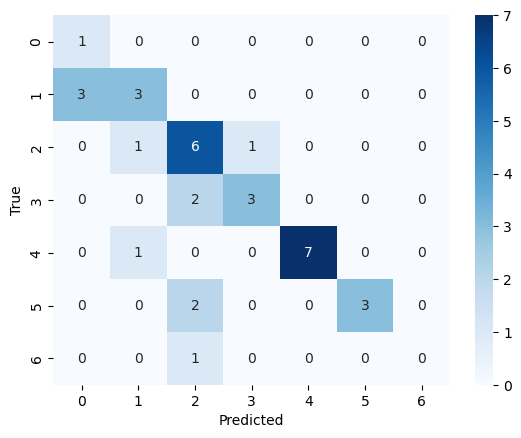

In [29]:
## Confusion matrix
cm = confusion_matrix(y_test, pred_rfc)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

<h3 style="color:#0FA345 "> Feature importances </h3>

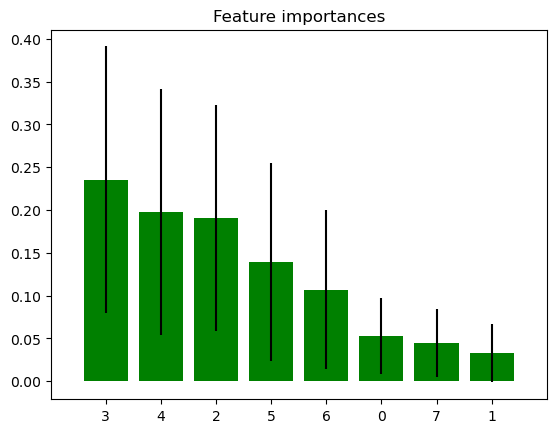

In [30]:
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
## Plot
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

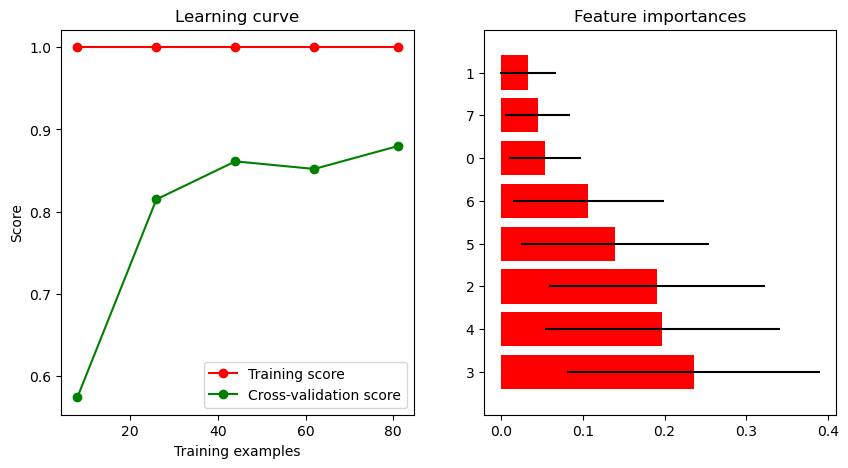

In [32]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# plot learning curve (set k=4 for cross-validation to avoid UserWarning: The least populated class 
train_sizes, train_scores, test_scores = learning_curve(rfc, X_train, y_train, cv=4, scoring='accuracy', n_jobs=-1)
ax1.set_title('Learning curve')
ax1.set_xlabel('Training examples')
ax1.set_ylabel('Score')
ax1.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color='r',
        label='Training score')
ax1.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color='g',
        label='Cross-validation score')
ax1.legend(loc='best')

# plot feature importances
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
ax2.set_title("Feature importances")
ax2.barh(range(X_train.shape[1]), importances[indices],
        color="r", xerr=std[indices], align="center")
ax2.set_yticks(range(X_train.shape[1]))
ax2.set_yticklabels(indices)
ax2.set_ylim([-1, X_train.shape[1]])

plt.show()

In [33]:
## Binarization
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6])

## Training OvA classifier (without semicolon ";" the classifier is shown)
ovr = OneVsRestClassifier(rfc)
ovr.fit(X_train, y_train) 

OneVsRestClassifier(estimator=RandomForestClassifier(n_estimators=1000))

<h3 style="color:#0FA345 "> => ROC </h3>

In [34]:
""" Get roc_auc
N.B.
The warning is caused by the fact that a specific class doesn't contain any positive samples, 
meaning there are no instances of that class in your test data.
"""
# ROC curve and area under curve for each class
y_score = ovr.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(rfc.n_classes_):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

## Micro-average ROC curve and area under curve
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

/home/notto4/anaconda3/envs/MLearning/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


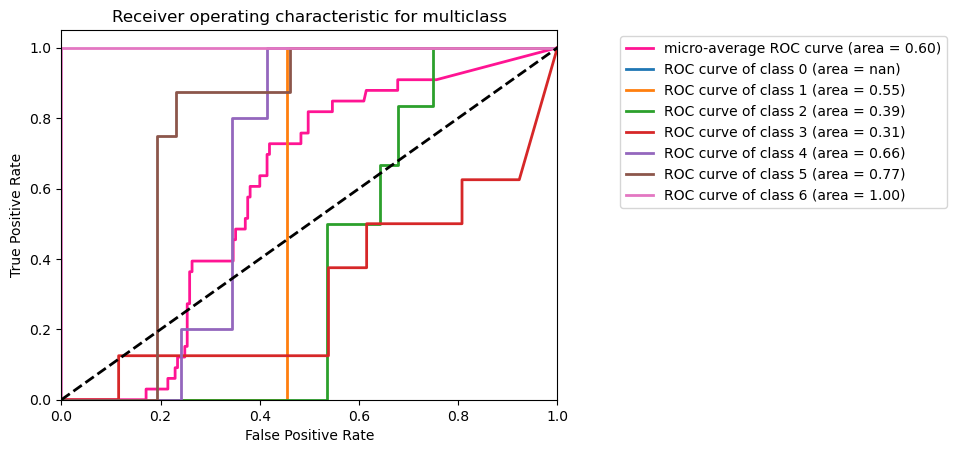

In [35]:
""" Plot ROC curve for each class and micro-average.
    fpr["micro"] and tpr["micro"] are the false positive rate and true positive rate for the micro-average, respectively, 
    while roc_auc["micro"] is the area under the ROC curve for the micro-average. 
"""
plt.figure()
lw = 2 #line width
plt.plot(fpr["micro"], tpr["micro"], color='deeppink',
        lw=lw, label='micro-average ROC curve (area = {0:0.2f})'
        ''.format(roc_auc["micro"]))
for i in range(rfc.n_classes_):          #ROC curve for each class separately
    plt.plot(fpr[i], tpr[i], lw=lw,
            label='ROC curve of class {0} (area = {1:0.2f})'
            ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)   #diagonal line from (0,0) to (1,1) as a reference line for a classifier that randomly guesses the class
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multiclass')
plt.legend(loc="lower right", bbox_to_anchor=(1.8, 0.5))
plt.show()


<h2 style="color:#0FA345 "> Comparison with SVM Classifier </h2>

In [39]:
clf_svm = SVC()
clf_svm.fit(X_train, y_train)
pred_clf = clf_svm.predict(X_test)
pred_clf

array([6, 3, 3, 3, 5, 6, 3, 4, 5, 6, 3, 3, 6, 1, 1, 2, 3, 5, 5, 4, 3, 1,
       5, 2, 6, 5, 3, 3, 3, 1, 3, 1, 6, 3])

In [40]:
precision2 = precision_score(y_test, pred_clf, average='weighted', zero_division=1)
accuracy2 = accuracy_score(y_test, pred_clf)
recall2 = recall_score(y_test, pred_clf, average='weighted')
f12 = f1_score(y_test, pred_clf, average='weighted')

print(f"accuracy {accuracy2}")  
print(f"precision {precision2}")  
print(f"recall {recall2}")
print(f"f1 {f12}")


accuracy 0.6764705882352942
precision 0.7879336349924585
recall 0.6764705882352942
f1 0.6546982429335371


In [43]:
""" Add the zero_division parameter to zero.
We are in a case in which there are classes with no predicted samples, to avoid warning in classification report.
UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
"""
print(classification_report(y_test, pred_clf, zero_division=0))
print("confusion matrix pred_clf SVM Classificator")
print(confusion_matrix(y_test, pred_clf))

              precision    recall  f1-score   support

           1       0.20      1.00      0.33         1
           2       1.00      0.33      0.50         6
           3       0.62      1.00      0.76         8
           4       0.50      0.20      0.29         5
           5       1.00      0.75      0.86         8
           6       0.83      1.00      0.91         5
           7       0.00      0.00      0.00         1

    accuracy                           0.68        34
   macro avg       0.59      0.61      0.52        34
weighted avg       0.76      0.68      0.65        34

confusion matrix pred_clf SVM Classificator
[[1 0 0 0 0 0 0]
 [4 2 0 0 0 0 0]
 [0 0 8 0 0 0 0]
 [0 0 3 1 0 1 0]
 [0 0 1 1 6 0 0]
 [0 0 0 0 0 5 0]
 [0 0 1 0 0 0 0]]


<h2 style="color:#0FA345 "> Comparison with Multi-Layer Perceptron Classifier </h2>

In [44]:
mlpc = MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=100,random_state=0)
mlpc.fit(X_train,y_train)
pred_mlpc = mlpc.predict(X_test)

/home/notto4/anaconda3/envs/MLearning/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [46]:
print(classification_report(y_test, pred_clf, zero_division=0))
print(confusion_matrix(y_test, pred_mlpc))
pred_mlpc

              precision    recall  f1-score   support

           1       0.20      1.00      0.33         1
           2       1.00      0.33      0.50         6
           3       0.62      1.00      0.76         8
           4       0.50      0.20      0.29         5
           5       1.00      0.75      0.86         8
           6       0.83      1.00      0.91         5
           7       0.00      0.00      0.00         1

    accuracy                           0.68        34
   macro avg       0.59      0.61      0.52        34
weighted avg       0.76      0.68      0.65        34

[[1 0 0 0 0 0 0]
 [4 0 2 0 0 0 0]
 [2 0 6 0 0 0 0]
 [0 0 4 0 0 1 0]
 [0 1 4 0 0 3 0]
 [0 0 0 0 0 5 0]
 [0 0 1 0 0 0 0]]


array([6, 1, 3, 3, 3, 6, 3, 3, 6, 6, 3, 3, 6, 1, 1, 3, 3, 6, 3, 2, 3, 1,
       6, 3, 6, 3, 1, 3, 3, 1, 3, 1, 6, 3])